# Tratamento dos dados para as análise

Primeira questão a ser tratada: 

"Motivo do porque não funcionou a calibração feita de forma aditiva a partir do cálculo da média?"

# Visualização da situação dos dados

Como forma de analisar se vai ser possível uma solução de forma aditiva sendo tratado como um erro aditivo, podemos plotar um gráfico com dispositivo Base x dispositivo novo, nos mesmos pontos/beacons.

Carregamento dos dados para plot

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.patches as mpatches



# Define a opção para mostrar TODAS as colunas, sem limite
pd.set_option('display.max_columns', None)

# Define a opção para mostrar TODAS as linhas, sem limite
pd.set_option('display.max_rows', None)


# Define a opção para mostrar o número máximo de elementos do array como infinito (None)
np.set_printoptions(threshold=np.inf)

In [47]:
df_original = pd.read_csv('../dataset-completo.csv')

weakColumns   = ['B1_weak', 'B2_weak', 'B3_weak', 'B4_weak', 'B5_weak', 'B6_weak', 'B7_weak', 'B8_weak', 'B9_weak']
strongColumns = ['B1_strong', 'B2_strong', 'B3_strong', 'B4_strong', 'B5_strong', 'B6_strong', 'B7_strong', 'B8_strong', 'B9_strong']
avgColumns    = ['B1_avg', 'B2_avg', 'B3_avg', 'B4_avg', 'B5_avg', 'B6_avg', 'B7_avg',  'B8_avg', 'B9_avg']
delColum      = ['Alpha', 'Beta', 'Gamma', 'Seno', 'Cosseno', 'Created', 'Brand', 'Model']

df = df_original[df_original['Direction'] == 'norte']
dropColumns = weakColumns + strongColumns + delColum

df = df.drop(dropColumns, axis=1)
print(df.head())
print(df["Direction"].unique())

   B1_avg  B2_avg  B3_avg  B4_avg  B5_avg  B6_avg  B7_avg  B8_avg  B9_avg  \
0     -82     -82     -73    -105     -73     -66     -78     -72     -78   
1     -77     -85     -75     -76     -76     -66     -76     -76     -78   
2     -80     -84     -73     -74     -91     -68     -81     -74     -76   
3     -82     -83     -74     -77     -76     -68     -81     -72     -74   
4     -78     -85     -75     -77     -82     -66     -81     -75     -76   

  Direction     RP     X     Y Device  
0     norte  P_6_1  1.57  8.75  Luis3  
1     norte  P_6_1  1.57  8.75  Luis3  
2     norte  P_6_1  1.57  8.75  Luis3  
3     norte  P_6_1  1.57  8.75  Luis3  
4     norte  P_6_1  1.57  8.75  Luis3  
['norte']


Dispositivos diferentes do base

In [48]:
devices = df["Device"].unique()
devices_sem_moto7 = [d for d in devices if d != "Moto7"]
print(devices_sem_moto7)

['Luis3', 'Wellington', 'Chaparro', 'Moto01', 'Moto6', 'Moto8', 'Joao', 'Josue', 'JulieS', 'Matteo', 'Francisco', 'Maggila', 'FelipeAmaral', 'Yuri', 'Moto2', 'Bruna', 'LuisHenrique', 'Horacio', 'Alexandre', 'fatima4', 'Jonathas', 'Moto5']


Separando os dados

In [49]:
ponto = "P_6_3"
reference_device = "Moto7"


#Dados dos base no ponto de referência (RP=ponto)
df_reference_device_calibr = df[(df["Device"] == reference_device) & (df["RP"] == ponto)]
print(f"shape do device base {reference_device}: {df_reference_device_calibr.shape}\n")

#Dados dos dispositivos de teste no ponto de referência (RP=ponto)
set_test_devices_calibr = {}
for device in devices_sem_moto7:
    set_test_devices_calibr[device] = df[(df["Device"] == device) & (df["RP"] == ponto)]
    print(f"shape do device {device}: {set_test_devices_calibr[device].shape}")



shape do device base Moto7: (29, 14)

shape do device Luis3: (23, 14)
shape do device Wellington: (29, 14)
shape do device Chaparro: (29, 14)
shape do device Moto01: (29, 14)
shape do device Moto6: (29, 14)
shape do device Moto8: (29, 14)
shape do device Joao: (29, 14)
shape do device Josue: (29, 14)
shape do device JulieS: (29, 14)
shape do device Matteo: (29, 14)
shape do device Francisco: (29, 14)
shape do device Maggila: (29, 14)
shape do device FelipeAmaral: (29, 14)
shape do device Yuri: (16, 14)
shape do device Moto2: (29, 14)
shape do device Bruna: (29, 14)
shape do device LuisHenrique: (29, 14)
shape do device Horacio: (28, 14)
shape do device Alexandre: (29, 14)
shape do device fatima4: (28, 14)
shape do device Jonathas: (29, 14)
shape do device Moto5: (29, 14)


plot dos dados usando 9 beacons de um mesmo ponto, usando base Moto7.

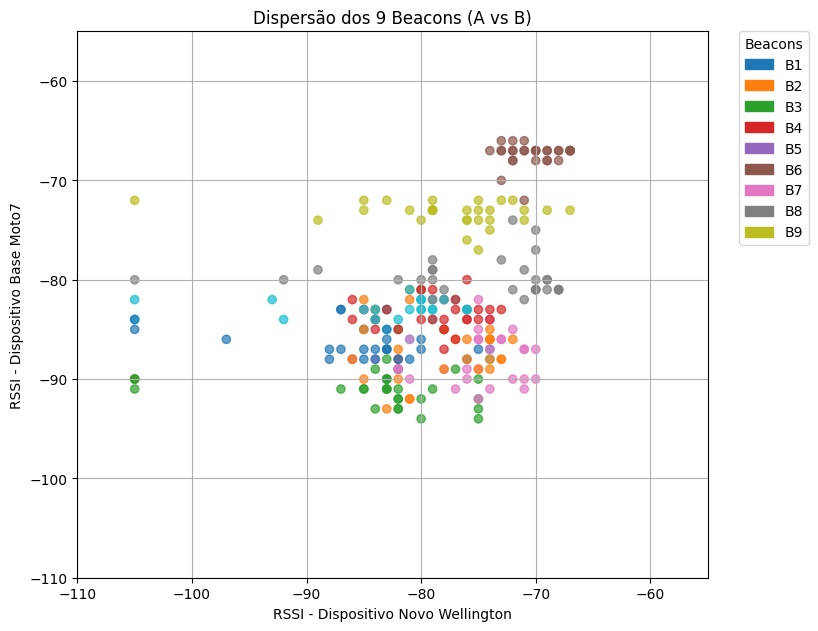

In [64]:
dispositivo = "Wellington"

# Quando o pontos mudarem, é preciso essa manipulação nos dados
#df_reference_device_calibr = df_reference_device_calibr.drop(['RP', 'X', 'Y', 'Direction', 'Device'], axis=1).to_numpy()

#df_device_calibr = set_test_devices_calibr[dispositivo].drop(['RP', 'X', 'Y', 'Direction', 'Device'], axis=1).to_numpy()


beacons = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9"]
cmap = plt.get_cmap('tab10')

plt.figure(figsize = (8, 6))

colors = range(9)

for i in range(df_reference_device_calibr.shape[0]):
    plt.scatter(
        df_device_calibr[i],
        df_reference_device_calibr[i],
        c = colors,
        cmap = "tab10",
        alpha = 0.7,
        label=f"Amostra {i}" if i == 0 else None
    )
    
legend_patches = [mpatches.Patch(color=cmap(i), label=beacons[i]) for i in range(len(beacons))]
plt.legend(
    handles=legend_patches, 
    title="Beacons",
    bbox_to_anchor=(1.05, 1), # Move para fora (direita)
    loc='upper left',         # Alinha o topo da legenda com o topo do gráfico
    borderaxespad=0           # Remove o espaço entre o eixo e a legenda
)
plt.tight_layout()
plt.xlabel(f"RSSI - Dispositivo Novo {dispositivo}")
plt.ylabel(f"RSSI - Dispositivo Base {reference_device}")
plt.title("Dispersão dos 9 Beacons (A vs B)")
plt.ylim(-110, -55)
plt.xlim(-110, -55)
plt.grid(True)
plt.show()
